In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/retail_sales_dataset.csv')

In [ ]:
data.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
data.shape

(1000, 9)

In [ ]:
data.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [ ]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
data.select_dtypes(include=['object'])
for col in data.select_dtypes(include=['object']):
    print(data[col].value_counts())

Date
2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-08-05     8
2023-02-05     8
              ..
2023-09-10     1
2023-02-16     1
2023-03-31     1
2023-01-25     1
2023-05-28     1
Name: count, Length: 345, dtype: int64
Customer ID
CUST001     1
CUST672     1
CUST659     1
CUST660     1
CUST661     1
           ..
CUST339     1
CUST340     1
CUST341     1
CUST342     1
CUST1000    1
Name: count, Length: 1000, dtype: int64
Gender
Female    510
Male      490
Name: count, dtype: int64
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data['Product Category'] = data['Product Category'].str.strip()

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
#Statistics for each column
for col in data.columns:
  if not pd.api.types.is_numeric_dtype(data[col]):
    print(f"Statistics for column '{col}' (non-numeric):")
    print(f"  Mode: {data[col].mode()[0]}")
    continue

  print(f"Statistics for column '{col}':")
  print(f"  Mean: {data[col].mean()}")
  print(f"  Median: {data[col].median()}")
  print(f"  Mode: {data[col].mode()[0]}")
  print(f"  Standard deviation: {data[col].std()}")
  print()

Statistics for column 'Transaction ID':
  Mean: 500.5
  Median: 500.5
  Mode: 1
  Standard deviation: 288.8194360957494

Statistics for column 'Date' (non-numeric):
  Mode: 2023-05-16 00:00:00
Statistics for column 'Customer ID' (non-numeric):
  Mode: CUST001
Statistics for column 'Gender' (non-numeric):
  Mode: Female
Statistics for column 'Age':
  Mean: 41.392
  Median: 42.0
  Mode: 43
  Standard deviation: 13.681429659122527

Statistics for column 'Product Category' (non-numeric):
  Mode: Clothing
Statistics for column 'Quantity':
  Mean: 2.514
  Median: 3.0
  Mode: 4
  Standard deviation: 1.1327343409145356

Statistics for column 'Price per Unit':
  Mean: 179.89
  Median: 50.0
  Mode: 50
  Standard deviation: 189.68135627129232

Statistics for column 'Total Amount':
  Mean: 456.0
  Median: 135.0
  Mode: 50
  Standard deviation: 559.997631555123



In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

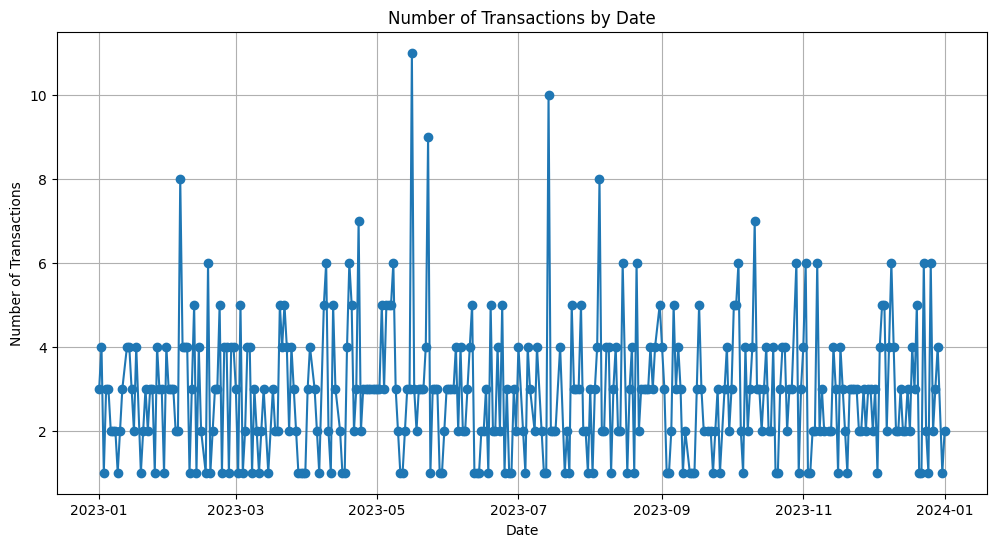

In [ ]:
#Transaction count by date
data['Date'] = pd.to_datetime(data['Date'])
daily_transactions = data.groupby('Date').size()

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions.index, daily_transactions.values, marker='o')
plt.title('Number of Transactions by Date')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns

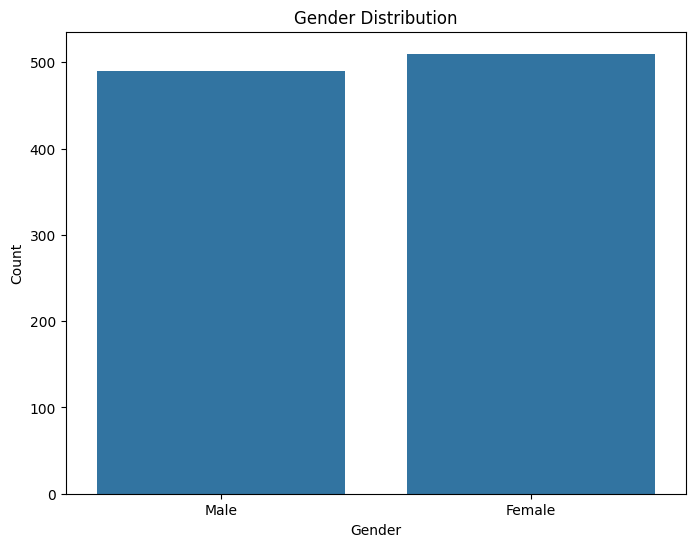

In [ ]:
#Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

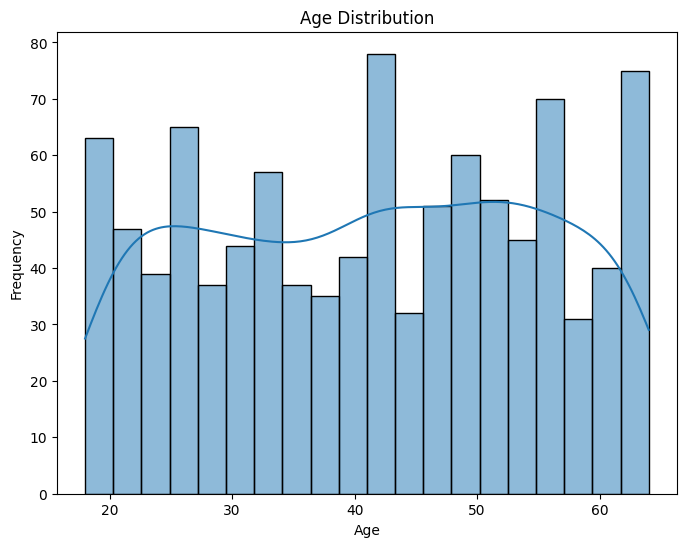

In [ ]:
#Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

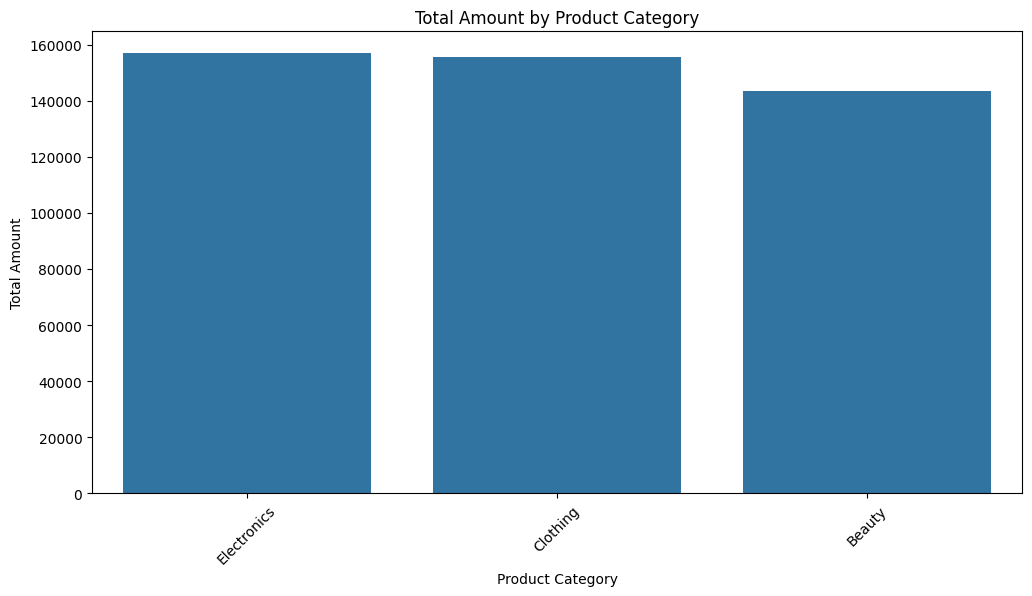

In [ ]:
#Total amount by Product category
plt.figure(figsize=(12, 6))
category_totals = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
sns.barplot(x=category_totals.index, y=category_totals.values)
plt.title('Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

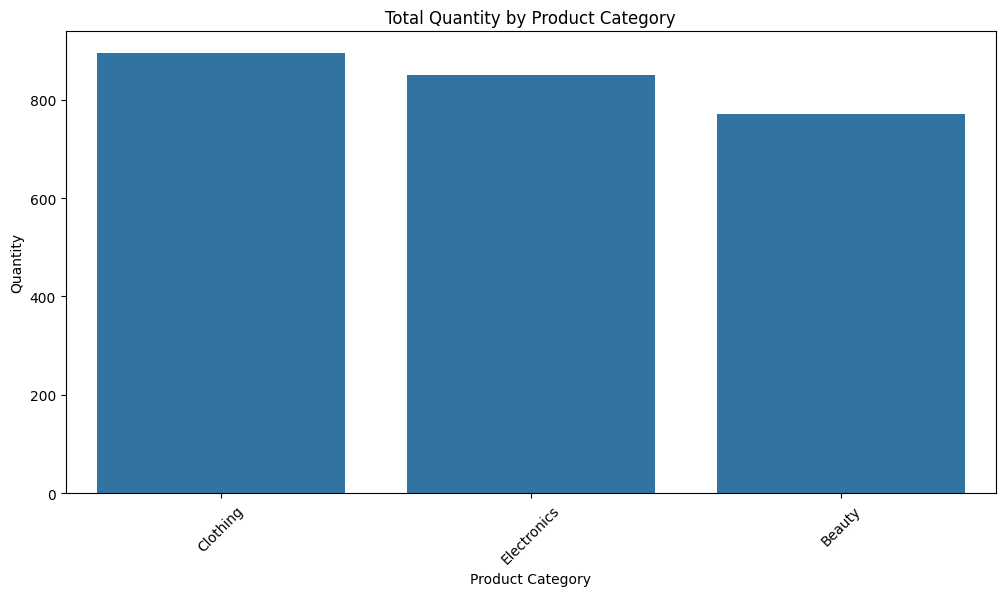

In [ ]:
#Quantity by Product Category
plt.figure(figsize=(12, 6))
category_quantities = data.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=category_quantities.index, y=category_quantities.values)
plt.title('Total Quantity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

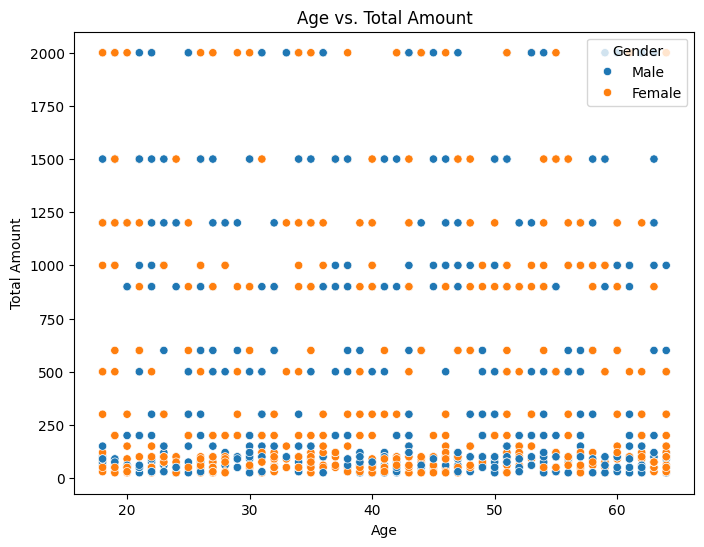

In [ ]:
#Age vs Total Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Total Amount', data=data, hue='Gender')
plt.title('Age vs. Total Amount')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.legend(title='Gender')
plt.show()

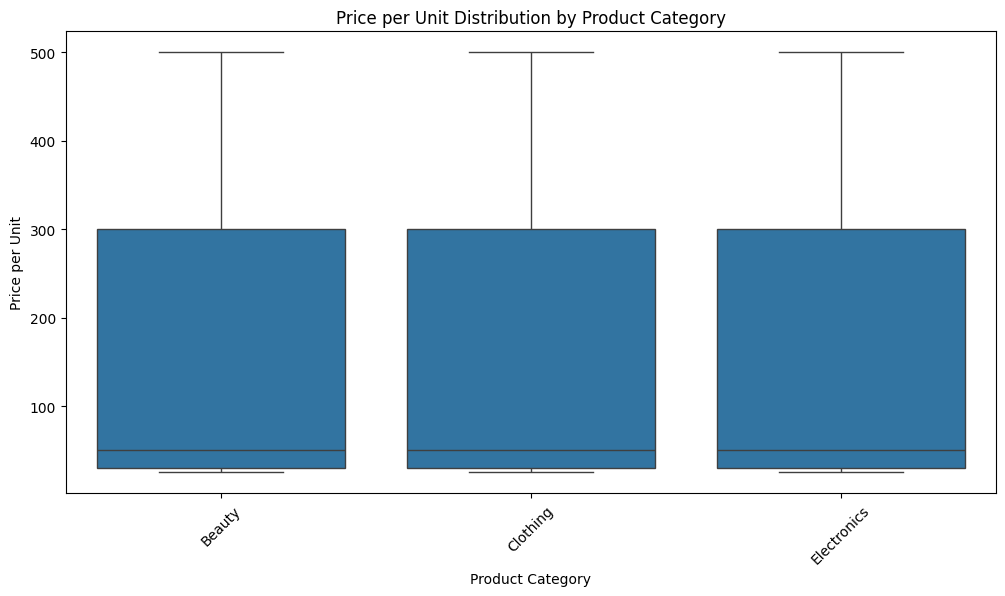

In [ ]:
#Price per Unit Distribution by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Price per Unit', data=data)
plt.title('Price per Unit Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price per Unit')
plt.xticks(rotation=45)
plt.show()

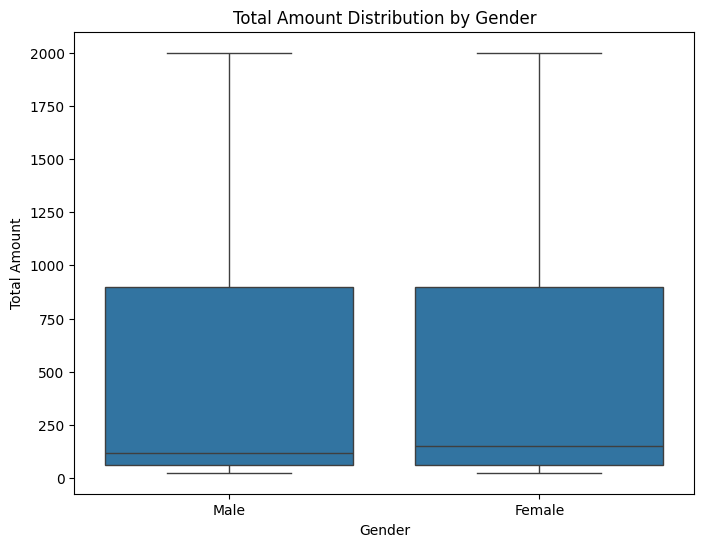

In [ ]:
#Total Amount Distribution by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Total Amount', data=data)
plt.title('Total Amount Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

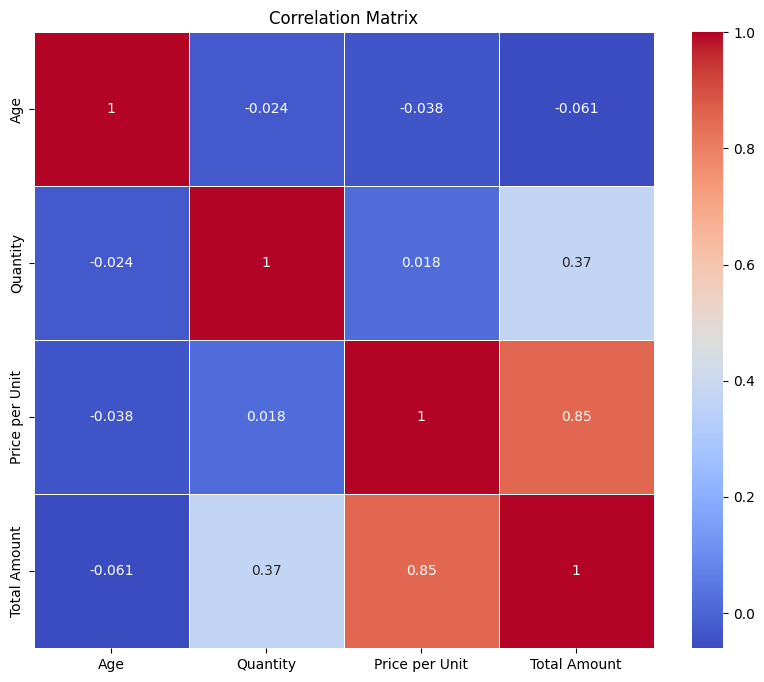

In [ ]:
#Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()